Run the cell below to import matplotlib.pyplot.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Import the "sin_cos.csv" file into a pandas DataFrame called df.<br>
Set the index to the first column. Use shift-tab for help if necessary.<br>
Display df.

In [2]:
# Import the CSV file into a DataFrame
df = pd.read_csv('sin_cos.csv', index_col=0)

# Display the DataFrame
df


,x,y,z
0,0.000000,0.0,1.000000
1,0.006289,0.006289433316067751,0.999980
2,0.012579,0.012578617838741058,0.999921
3,0.018868,NaN,0.999822
4,NaN,0.025155245389375847,0.999684
...,...,...,...
995,6.258027,-0.02515524538937684,NaN
996,NaN,-0.018867304784467676,0.999822
997,6.270606,-0.012578617838742121,NaN
998,6.276896,-0.006289433316068405,0.999980


Notice there are some NaNs in the data (missing values). We'll fix the NaNs below, but first let's check if the data has been correctly loaded as float point numbers. Run the cell below.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       812 non-null    float64
 1   y       930 non-null    object 
 2   z       870 non-null    float64
dtypes: float64(2), object(1)
memory usage: 31.2+ KB


It looks like the "y" column has not been imported as floating point numbers. Let us try to convert the dataframe to numerical values. Run the cell below.

In [4]:

# df.apply(pd.to_numeric)



Oh oh, that didn't work. Read the above error message to see what is going wrong. Display the row with the problem.

In [5]:
print(df.iloc[141])

x               0.886816
y    a0.7750637288796015
z               0.631883
Name: 141, dtype: object


Remove the non-numeric character, and display that same row again.

In [6]:

# Remove non-numeric characters and convert to numeric
df.loc[141, 'y'] = df.loc[141, 'y'] [1:]
print(df.loc[141, 'y'])

# Display the row again
df.iloc[141]


0.7750637288796015


x              0.886816
y    0.7750637288796015
z              0.631883
Name: 141, dtype: object

The problematic value still has a datatype of "object". Now, convert the entire dataframe to numerical values and display df.info() again.

In [7]:
# Remove non-numeric characters and convert to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Display information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       812 non-null    float64
 1   y       930 non-null    float64
 2   z       870 non-null    float64
dtypes: float64(3)
memory usage: 63.5 KB


Now that we have numerical data, we can produce a visualization to see how it looks. Just run the cell below.

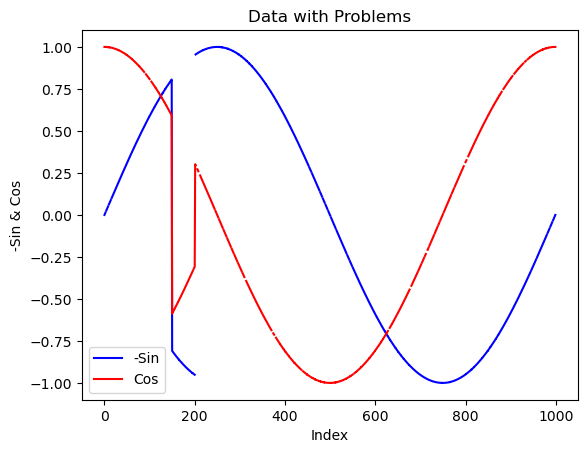

In [8]:
# plot the data to see the gaps
plt.plot(df["y"],color="b")
plt.plot(df["z"],color="r")
plt.xlabel("Index")
plt.ylabel("-Sin & Cos")
plt.title("Data with Problems")
plt.legend(["-Sin","Cos"])

We can see there are some gaps in the plot where the NaNs are present. More troubling though is the area between index 145 and 205 where the sine and cosine values seem incorrect. Display a slice of the dataframe showing rows 145 to 205.

In [9]:
df.loc[145:205]

,x,y,z
145,0.911974,0.790714,0.612186
146,0.918263,0.794548,0.607201
147,0.924553,0.798352,0.602192
148,0.930842,0.802123,0.597159
149,0.937132,0.805863,0.592102
...,...,...,...
201,1.264184,NaN,0.301830
202,1.270474,0.955241,0.295828
203,1.276763,0.957083,NaN
204,1.283053,0.958887,0.283789


Can you see what the problem is, and which range of lines have the problem? Fix it and display the rows from 145 to 205 again.

In [10]:
# Multiply rows 150 to 200 by 1 
df.loc[150:200, ['y', 'z']] *= -1

# Display the slice of the DataFrame again
df.loc[150:200]

            x         y         z
150       NaN  0.809571  0.587022
151  0.949711  0.813247  0.581918
152  0.956000  0.816891  0.576792
153  0.962290  0.820503  0.571643
154  0.968579  0.824082  0.566471
155  0.974869  0.827628       NaN
156  0.981158  0.831142  0.556060
157  0.987448  0.834623  0.550822
158  0.993737  0.838071  0.545562
159  1.000026  0.841485  0.540280
160       NaN  0.844867  0.534977
161  1.012605  0.848215  0.529653
162       NaN  0.851529  0.524307
163  1.025184  0.854810       NaN
164       NaN  0.858057  0.513555
165  1.037763       NaN  0.508148
166  1.044053  0.864449  0.502721
167  1.050342  0.867593  0.497274
168       NaN  0.870704  0.491808
169  1.062921  0.873780       NaN
170  1.069211  0.876821  0.480816
171  1.075500  0.879828  0.475292
172  1.081790  0.882800  0.469749
173  1.088079  0.885737  0.464188
174       NaN  0.888639  0.458608
175  1.100658  0.891506       NaN
176       NaN  0.894337  0.447394
177  1.113237  0.897133  0.441760
178  1.119527 

Produce another plot to see how the data looks now. Just run the cell below.

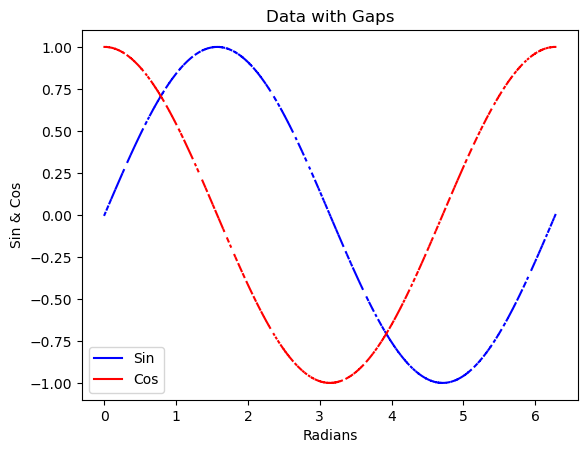

In [11]:
# plot the data to see the gaps
plt.plot(df["x"], df["y"],color="b")
plt.plot(df["x"], df["z"],color="r")
plt.xlabel("Radians")
plt.ylabel("Sin & Cos")
plt.title("Data with Gaps")
plt.legend(["Sin","Cos"])

We can see there are still gaps where the NaNs are present.
Use one of the pandas methods to fill in the missing data.<br>
You could fill in a default value, fill in a mean, or do simple interpolation.<br>
You can do some web searching on different ways to fill in missing data in pandas.<br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#interpolation<br><br>
Fill in the missing values and save this as a new DataFrame called dfi.

In [12]:
# Create a new DataFrame with missing values filled using linear interpolation
dfi = df.interpolate(method='linear')

dfi

,x,y,z
0,0.000000,0.000000e+00,1.000000
1,0.006289,6.289433e-03,0.999980
2,0.012579,1.257862e-02,0.999921
3,0.018868,1.886693e-02,0.999822
4,0.025158,2.515525e-02,0.999684
...,...,...,...
995,6.258027,-2.515525e-02,0.999664
996,6.264317,-1.886730e-02,0.999822
997,6.270606,-1.257862e-02,0.999901
998,6.276896,-6.289433e-03,0.999980


Let's visualize your new DataFrame with the NaNs filled in. Run the cell below.<br>
Feel free to try filling in the missing data a few different ways and seeing what the plot looks like.<br>
Choose the one that looks best.

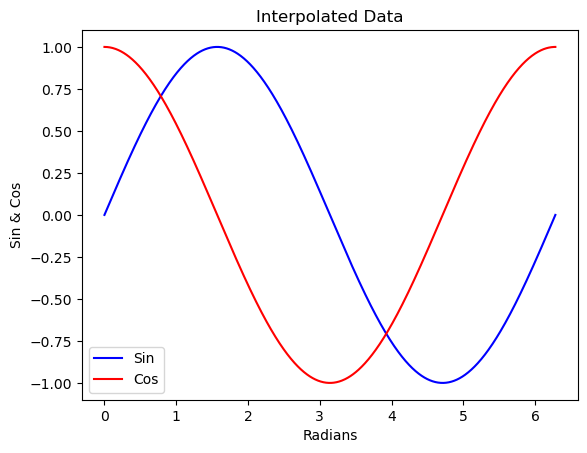

In [13]:
# plot again to see the gaps filled in nicely
plt.plot(dfi["x"],dfi["y"],color="b")
plt.plot(dfi["x"],dfi["z"],color="r")
plt.xlabel("Radians")
plt.ylabel("Sin & Cos")
plt.title("Interpolated Data")
plt.legend(["Sin","Cos"])

Okay, very nice. Now, add a new column named "tan" that holds the tangent of x, i.e. $\tan(x)$. Display only the x and tan columns.

In [20]:
# Add a new column "tan" to dfi containing the tangent of the index values
dfi['tan'] = np.tan(df['x'])

# Display only the index and "tan" columns
dfi[['tan']]



,tan
0,0.000000e+00
1,6.289558e-03
2,1.257961e-02
3,1.887066e-02
4,NaN
...,...
995,-2.516321e-02
996,NaN
997,-1.257961e-02
998,-6.289558e-03


The values in the x-column are angles, expressed as radians. Change the x column so that the angles are written as degrees. Display the x and tan columns of the dataframe.

In [21]:
# Convert angles from radians to degrees in the "x" column
dfi['x'] = np.degrees(df['x'])

# Display the "x" and "tan" columns of the DataFrame
dfi[['x', 'tan']]

,x,tan
0,0.000000,0.000000e+00
1,0.360360,6.289558e-03
2,0.720721,1.257961e-02
3,1.081081,1.887066e-02
4,NaN,NaN
...,...,...
995,358.558559,-2.516321e-02
996,NaN,NaN
997,359.279279,-1.257961e-02
998,359.639640,-6.289558e-03


Now try narrowing down dfi.<br>
Select x values greater than 90 degrees, and less than 270 degrees; store the x and tan columns in a new dataframe called df_tan.<br>
Display the results.

In [22]:
# Filter the DataFrame dfi to select rows with x values between 90 and 270 degrees
df_tan = dfi[(dfi['x'] > 90) & (dfi['x'] < 270)] [['x', 'tan']]

# Display the new DataFrame df_tan
df_tan


,x,tan
250,90.090090,-635.982628
251,90.450450,-127.194010
252,90.810811,-70.660078
253,91.171171,-48.914967
254,91.531532,-37.401863
...,...,...
745,268.468468,37.401863
746,268.828829,48.914967
747,269.189189,70.660078
748,269.549550,127.194010


Run the cell below to visualize the data in df_tan.

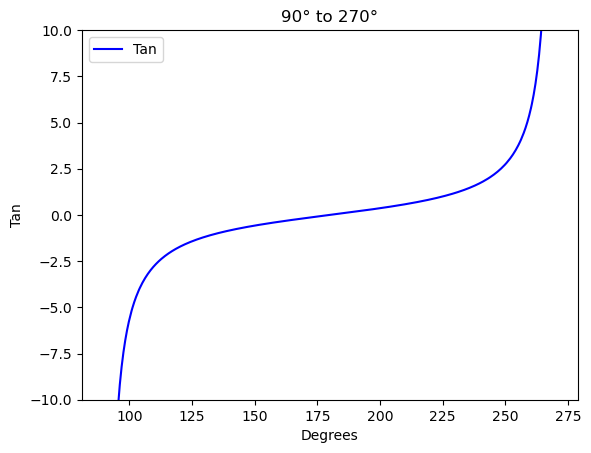

In [23]:
plt.plot(df_tan["x"], df_tan["tan"],color="b")
plt.ylim([-10,10])
plt.xlabel("Degrees")
plt.ylabel("Tan")
plt.title("90\N{degree sign} to 270\N{degree sign}")
plt.legend(["Tan"])